In [315]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [298]:
df_emission = pd.read_csv(r'../../results/df_emission-ContiniuedTo2040.csv')
df_emission = df_emission.rename(columns={'Label': 'future'})
df_emission

,Year,Result,Scenario,Strategy,dist_BEB,dist_CDB,dist_HEB,future,YearlyResult,Yearly_dist_CDB,Yearly_dist_HEB,Yearly_dist_BEB,CO2e_CDB,CO2e_HEB,CO2e,YearlyResult100000gals,YearlyResult-1000gallons
0,2022,2738.750000,lo-cap,Status quo,674.998976,10965.0,899.999000,Status quo,707460.738888,2.832426e+06,2.324834e+05,1.743625e+05,9155.839172,619.833953,9775.673124,7.074607,707.460739
1,2023,2738.750000,lo-cap,Status quo,674.998976,10965.0,899.999000,Status quo,707460.738888,2.832426e+06,2.324834e+05,1.743625e+05,9155.839172,619.833953,9775.673124,7.074607,707.460739
2,2024,2738.750000,lo-cap,Status quo,674.998976,10965.0,899.999000,Status quo,707460.738888,2.832426e+06,2.324834e+05,1.743625e+05,9155.839172,619.833953,9775.673124,7.074607,707.460739
3,2025,2738.750000,lo-cap,Status quo,674.998976,10965.0,899.999000,Status quo,707460.738888,2.832426e+06,2.324834e+05,1.743625e+05,9155.839172,619.833953,9775.673124,7.074607,707.460739
4,2026,2738.750000,lo-cap,Status quo,674.998976,10965.0,899.999000,Status quo,707460.738888,2.832426e+06,2.324834e+05,1.743625e+05,9155.839172,619.833953,9775.673124,7.074607,707.460739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,2036,645.890019,mid-cap,Hybrid+Electric,7739.991687,0.0,4800.897299,mid-cap Hybrid+Electric,166843.205944,0.000000e+00,1.240145e+06,1.999357e+06,0.000000,3306.402729,3306.402729,1.668432,166.843206
186,2037,533.541676,mid-cap,Hybrid+Electric,8414.971644,0.0,4125.917342,mid-cap Hybrid+Electric,137821.921839,0.000000e+00,1.065787e+06,2.173715e+06,0.000000,2841.540551,2841.540551,1.378219,137.821922
187,2038,425.615739,mid-cap,Hybrid+Electric,9089.875157,0.0,3451.013828,mid-cap Hybrid+Electric,109943.012423,0.000000e+00,8.914493e+05,2.348053e+06,0.000000,2376.731021,2376.731021,1.099430,109.943012
188,2039,323.111088,mid-cap,Hybrid+Electric,9764.998531,0.0,2775.890455,mid-cap Hybrid+Electric,83464.503435,0.000000e+00,7.170547e+05,2.522447e+06,0.000000,1911.770072,1911.770072,0.834645,83.464503


In [299]:
df_emission_aggregated = df_emission.groupby(['future', 'Scenario', 'Strategy'], as_index=False)[['YearlyResult', 'CO2e', 'Yearly_dist_CDB', 'Yearly_dist_HEB', 'Yearly_dist_BEB']].sum()
df_emission_aggregated

,future,Scenario,Strategy,YearlyResult,CO2e,Yearly_dist_CDB,Yearly_dist_HEB,Yearly_dist_BEB
0,Status quo,lo-cap,Status quo,1.344175e+07,185737.789365,5.381610e+07,4.417185e+06,3.312887e+06
1,hi-cap Electric,hi-cap,Electric,6.796995e+06,101374.955740,2.829358e+07,3.719135e+06,2.953760e+07
2,hi-cap Hybrid,hi-cap,Hybrid,1.071956e+07,158789.987665,6.215836e+06,5.202169e+07,3.312784e+06
3,hi-cap Hybrid+Electric,hi-cap,Hybrid+Electric,5.572264e+06,89315.688673,6.837397e+06,2.521011e+07,2.950280e+07
4,lo-cap Electric,lo-cap,Electric,9.954710e+06,146410.322353,4.165014e+07,4.416844e+06,1.548333e+07
5,lo-cap Hybrid,lo-cap,Hybrid,1.121670e+07,164070.834343,1.554016e+07,4.269732e+07,3.312830e+06
6,lo-cap Hybrid+Electric,lo-cap,Hybrid+Electric,9.290610e+06,141124.044906,3.138623e+07,1.487835e+07,1.528573e+07
7,mid-cap Electric,mid-cap,Electric,7.994369e+06,120784.055640,3.372237e+07,4.416952e+06,2.341099e+07
8,mid-cap Hybrid,mid-cap,Hybrid,1.084165e+07,160072.311202,8.480245e+06,4.975722e+07,3.312843e+06
9,mid-cap Hybrid+Electric,mid-cap,Hybrid+Electric,6.702125e+06,107997.665342,1.087212e+07,2.732541e+07,2.335278e+07


In [300]:
status_quo_emissions = df_emission_aggregated['CO2e'].loc[df_emission_aggregated['future']=='Status quo'].item()

# Calculate avoided CO2e
df_emission_aggregated['avoided_CO2e'] = status_quo_emissions - df_emission_aggregated['CO2e']
df_emission_aggregated

,future,Scenario,Strategy,YearlyResult,CO2e,Yearly_dist_CDB,Yearly_dist_HEB,Yearly_dist_BEB,avoided_CO2e
0,Status quo,lo-cap,Status quo,1.344175e+07,185737.789365,5.381610e+07,4.417185e+06,3.312887e+06,0.000000
1,hi-cap Electric,hi-cap,Electric,6.796995e+06,101374.955740,2.829358e+07,3.719135e+06,2.953760e+07,84362.833625
2,hi-cap Hybrid,hi-cap,Hybrid,1.071956e+07,158789.987665,6.215836e+06,5.202169e+07,3.312784e+06,26947.801699
3,hi-cap Hybrid+Electric,hi-cap,Hybrid+Electric,5.572264e+06,89315.688673,6.837397e+06,2.521011e+07,2.950280e+07,96422.100692
4,lo-cap Electric,lo-cap,Electric,9.954710e+06,146410.322353,4.165014e+07,4.416844e+06,1.548333e+07,39327.467012
5,lo-cap Hybrid,lo-cap,Hybrid,1.121670e+07,164070.834343,1.554016e+07,4.269732e+07,3.312830e+06,21666.955022
6,lo-cap Hybrid+Electric,lo-cap,Hybrid+Electric,9.290610e+06,141124.044906,3.138623e+07,1.487835e+07,1.528573e+07,44613.744459
7,mid-cap Electric,mid-cap,Electric,7.994369e+06,120784.055640,3.372237e+07,4.416952e+06,2.341099e+07,64953.733725
8,mid-cap Hybrid,mid-cap,Hybrid,1.084165e+07,160072.311202,8.480245e+06,4.975722e+07,3.312843e+06,25665.478163
9,mid-cap Hybrid+Electric,mid-cap,Hybrid+Electric,6.702125e+06,107997.665342,1.087212e+07,2.732541e+07,2.335278e+07,77740.124022


In [301]:
df_costs = pd.read_csv(r'../../results/df_all_costs-ContiniuedTo2040.csv')
df_costs

,Year,BEB - Value,HEB - Value,BEB - Diff,HEB - Diff,BEB - Investment Cost (M$),HEB - Investment Cost (M$),future,yearly_purchased_buses,CDB- Investment Cost (M$),total_cost,conventional,electric,hybrid,cumulative_cost,operating_cost,maintenance_cost
0,2022,15.0,9.0,0.0,0.0,0.0,0.0,hi-cap Electric,0.0,0.0,0.0,NaN,NaN,NaN,0.0,2.565464,0.391071
1,2023,23.0,9.0,8.0,0.0,10.4,0.0,hi-cap Electric,8.0,0.0,10.4,NaN,NaN,NaN,10.4,2.536192,0.400357
2,2024,23.0,9.0,0.0,0.0,0.0,0.0,hi-cap Electric,0.0,0.0,0.0,NaN,NaN,NaN,10.4,2.536303,0.400357
3,2025,27.0,9.0,4.0,0.0,5.2,0.0,hi-cap Electric,4.0,0.0,5.2,NaN,NaN,NaN,15.6,2.485444,0.414643
4,2026,38.0,9.0,11.0,0.0,14.3,0.0,hi-cap Electric,11.0,0.0,14.3,NaN,NaN,NaN,29.9,2.353073,0.452857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,2036,NaN,NaN,NaN,NaN,0.0,0.0,Status quo,NaN,1.2,1.2,3.0,0.0,0.0,57.0,2.565464,0.391071
186,2037,NaN,NaN,NaN,NaN,0.0,0.0,Status quo,NaN,0.0,0.0,0.0,0.0,0.0,57.0,2.565464,0.391071
187,2038,NaN,NaN,NaN,NaN,0.0,0.0,Status quo,NaN,0.0,0.0,0.0,0.0,0.0,57.0,2.565464,0.391071
188,2039,NaN,NaN,NaN,NaN,0.0,0.0,Status quo,NaN,3.6,3.6,9.0,0.0,0.0,60.6,2.565464,0.391071


In [302]:
# Define the mapping dictionary
future_mapping = {
    'hi-cap Hybrid Electric': 'hi-cap Hybrid+Electric',
    'mid-cap Hybrid Electric': 'mid-cap Hybrid+Electric',
    'lo-cap Hybrid Electric': 'lo-cap Hybrid+Electric',
#    'Status quo': 'lo-cap Status quo'
}

# Assuming df_costs has already been loaded, apply the mapping to the 'future' column
df_costs['future'] = df_costs['future'].replace(future_mapping)

# Show the unique values in 'future' to confirm the mapping was successful
df_costs['future'].unique()

array(['hi-cap Electric', 'mid-cap Electric', 'lo-cap Electric',
       'hi-cap Hybrid', 'mid-cap Hybrid', 'lo-cap Hybrid',
       'hi-cap Hybrid+Electric', 'mid-cap Hybrid+Electric',
       'lo-cap Hybrid+Electric', 'Status quo'], dtype=object)

In [303]:
df_costs_aggregated = df_costs.groupby(['future'], as_index=False)[['total_cost', 'operating_cost', 'maintenance_cost']].sum()
df_costs_aggregated['Total_Expenditure'] = df_costs_aggregated['total_cost'] + df_costs_aggregated['operating_cost'] + df_costs_aggregated['maintenance_cost']
df_costs_aggregated

,future,total_cost,operating_cost,maintenance_cost,Total_Expenditure
0,Status quo,62.6,48.743818,7.430357,118.774175
1,hi-cap Electric,343.2,28.779221,14.971429,386.950649
2,hi-cap Hybrid,99.0,39.241050,6.292500,144.533550
3,hi-cap Hybrid+Electric,432.3,24.394584,14.599643,471.294226
4,lo-cap Electric,152.1,38.401536,10.752857,201.254393
5,lo-cap Hybrid,99.0,41.034559,6.453214,146.487773
6,lo-cap Hybrid+Electric,179.6,36.025885,10.508929,226.134814
7,mid-cap Electric,282.1,32.383420,13.124286,327.607705
8,mid-cap Hybrid,99.0,39.684878,6.333214,145.018092
9,mid-cap Hybrid+Electric,353.2,27.763219,12.719643,393.682861


In [304]:
## Version without discount rate

## Merge the dataframes on 'future'
#df_cost_emission_aggregated = df_emission_aggregated.merge(df_costs_aggregated[['future', 'total_cost', 'operating_cost', 'maintenance_cost', 'Total_Expenditure']], on='future', how='left')

## Display the updated df_results with costs ready for LCC calculation
#df_cost_emission_aggregated


In [305]:
# Apply 4% discount rate to costs
discount_rate = 0.04
years = list(range(2022, 2041))  # from 2022 to 2040

# Calculate discount factor for each year
discount_factors = {year: 1 / ((1 + discount_rate) ** (year - 2022)) for year in years}

# Merge year info if df_costs has a 'year' column
df_costs['discount_factor'] = df_costs['Year'].map(discount_factors)

# Apply discounting
df_costs['discounted_total_cost'] = df_costs['total_cost'] * df_costs['discount_factor']
df_costs['discounted_operating_cost'] = df_costs['operating_cost'] * df_costs['discount_factor']
df_costs['discounted_maintenance_cost'] = df_costs['maintenance_cost'] * df_costs['discount_factor']

# Aggregate discounted costs
df_costs_aggregated = df_costs.groupby(['future'], as_index=False)[['discounted_total_cost', 'discounted_operating_cost', 'discounted_maintenance_cost']].sum()
df_costs_aggregated['Total_Expenditure'] = df_costs_aggregated['discounted_total_cost'] + df_costs_aggregated['discounted_operating_cost'] + df_costs_aggregated['discounted_maintenance_cost']

# Merge with emissions data
df_cost_emission_aggregated = df_emission_aggregated.merge(
    df_costs_aggregated[['future', 'discounted_total_cost', 'discounted_operating_cost', 'discounted_maintenance_cost', 'Total_Expenditure']],
    on='future', how='left'
)

# Rename for compatibility
df_cost_emission_aggregated = df_cost_emission_aggregated.rename(columns={
    'discounted_total_cost': 'total_cost',
    'discounted_operating_cost': 'operating_cost',
    'discounted_maintenance_cost': 'maintenance_cost'
})

df_cost_emission_aggregated

,future,Scenario,Strategy,YearlyResult,CO2e,Yearly_dist_CDB,Yearly_dist_HEB,Yearly_dist_BEB,avoided_CO2e,total_cost,operating_cost,maintenance_cost,Total_Expenditure
0,Status quo,lo-cap,Status quo,1.344175e+07,185737.789365,5.381610e+07,4.417185e+06,3.312887e+06,0.000000,47.335032,35.042436,5.341761,87.719229
1,hi-cap Electric,hi-cap,Electric,6.796995e+06,101374.955740,2.829358e+07,3.719135e+06,2.953760e+07,84362.833625,230.388471,23.012501,9.816584,263.217556
2,hi-cap Hybrid,hi-cap,Hybrid,1.071956e+07,158789.987665,6.215836e+06,5.202169e+07,3.312784e+06,26947.801699,90.882765,28.507664,4.555430,123.945859
3,hi-cap Hybrid+Electric,hi-cap,Hybrid+Electric,5.572264e+06,89315.688673,6.837397e+06,2.521011e+07,2.950280e+07,96422.100692,311.556273,19.523480,9.524002,340.603755
4,lo-cap Electric,lo-cap,Electric,9.954710e+06,146410.322353,4.165014e+07,4.416844e+06,1.548333e+07,39327.467012,104.520978,28.706458,7.365802,140.593239
5,lo-cap Hybrid,lo-cap,Hybrid,1.121670e+07,164070.834343,1.554016e+07,4.269732e+07,3.312830e+06,21666.955022,80.297868,30.041009,4.690670,115.029548
6,lo-cap Hybrid+Electric,lo-cap,Hybrid+Electric,9.290610e+06,141124.044906,3.138623e+07,1.487835e+07,1.528573e+07,44613.744459,126.233815,27.112440,7.203238,160.549493
7,mid-cap Electric,mid-cap,Electric,7.994369e+06,120784.055640,3.372237e+07,4.416952e+06,2.341099e+07,64953.733725,186.029213,25.168109,8.742443,219.939765
8,mid-cap Hybrid,mid-cap,Hybrid,1.084165e+07,160072.311202,8.480245e+06,4.975722e+07,3.312843e+06,25665.478163,88.146082,28.908765,4.591950,121.646797
9,mid-cap Hybrid+Electric,mid-cap,Hybrid+Electric,6.702125e+06,107997.665342,1.087212e+07,2.732541e+07,2.335278e+07,77740.124022,248.788239,21.740169,8.447198,278.975606


In [306]:
### First version of the plot only with cost for simulation years to 2040

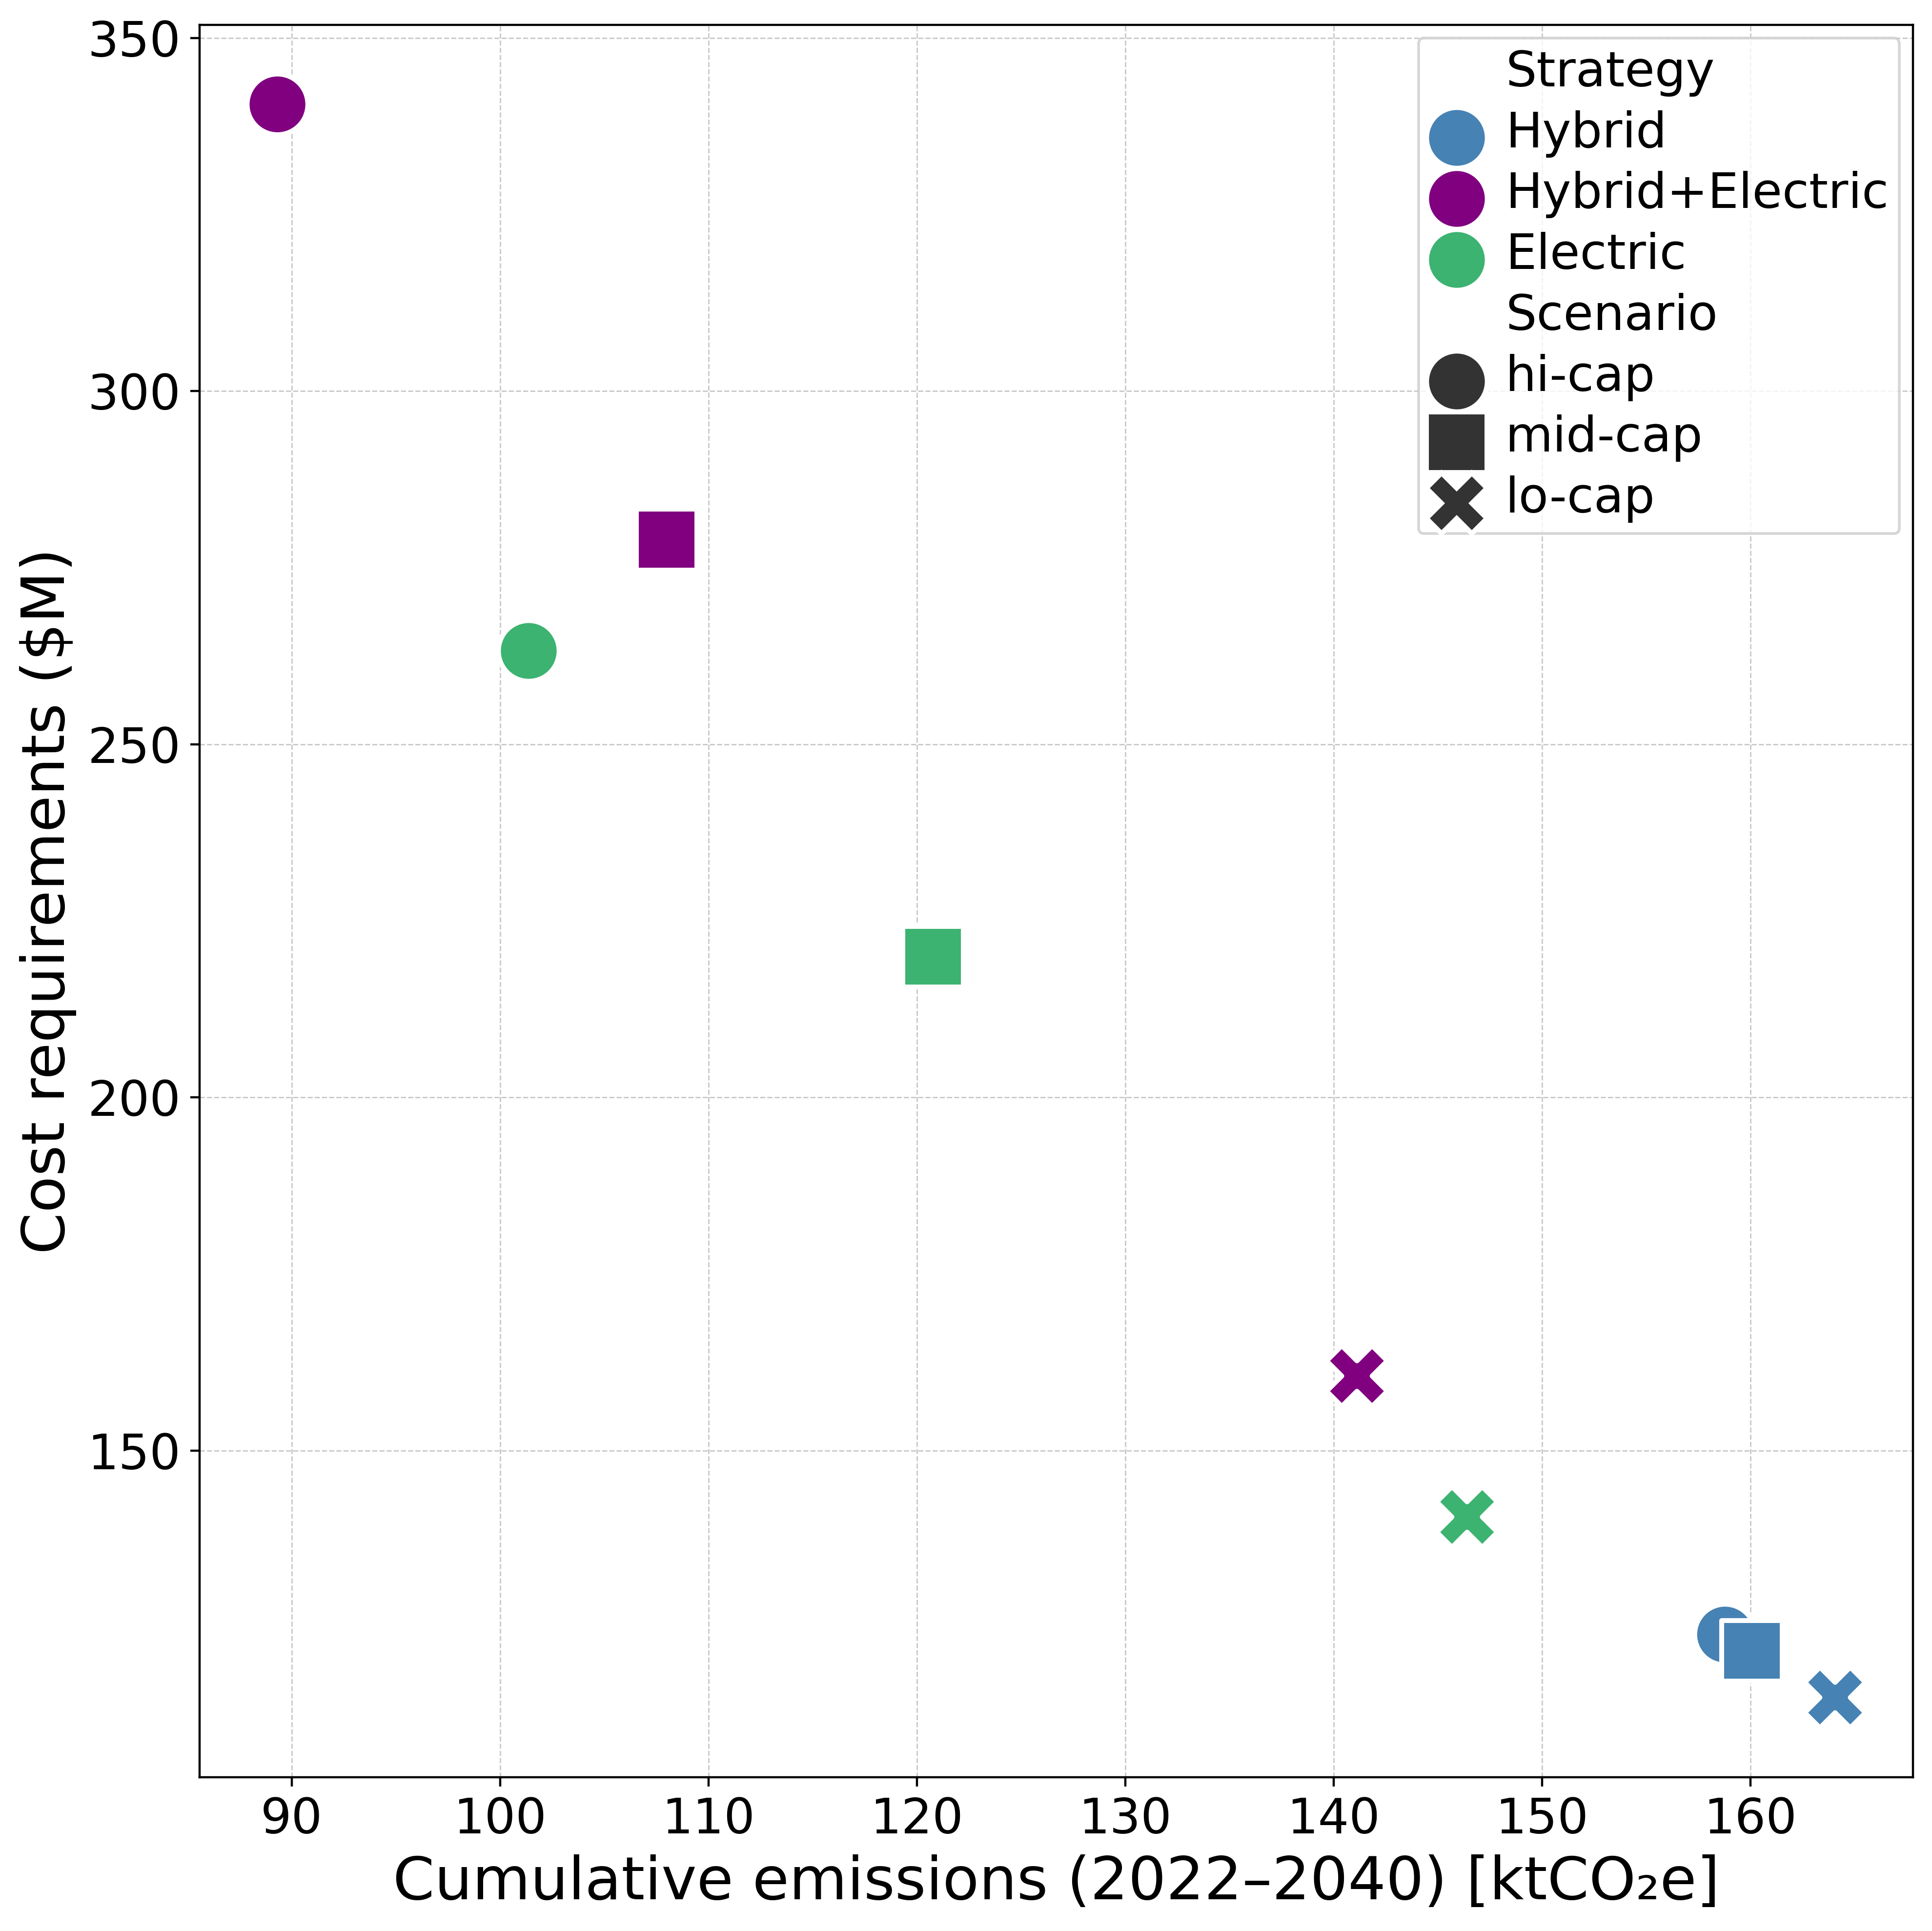

In [313]:
df = df_cost_emission_aggregated.copy()

# Unit conversion
df['CO2e_kt'] = df['CO2e'] / 1000
df['Total_Expenditure_M'] = df['Total_Expenditure']

# Filter out 'Status quo'
df_plot = df[df['future'] != 'Status quo'].copy()

# Color and marker definitions
colors = {
    'Hybrid': 'steelblue',
    'Hybrid+Electric': 'purple',
    'Electric': 'mediumseagreen'
}
markers = {
    'hi-cap': 'o',
    'lo-cap': 'X',
    'mid-cap': 's'
}

# Start plot
plt.figure(figsize=(10, 10), dpi=400)
plot = sns.scatterplot(
    data=df_plot,
    x='CO2e_kt',
    y='Total_Expenditure_M',
    hue='Strategy',
    hue_order=list(colors.keys()),
    palette=colors,
    style='Scenario',
    style_order=['hi-cap','mid-cap','lo-cap'],  # Scenario legend order
    markers=markers,
    zorder= 3,
    s=500
)

# Axis labels
plt.xlabel('Cumulative emissions (2022–2040) [ktCO₂e]', fontsize=22)
plt.ylabel('Cost requirements ($M)', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Customize legend
legend = plot.legend_
legend.get_title().set_fontsize('20')
for text in legend.get_texts():
    text.set_fontsize(18)

    
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)


#plt.xlim(0, 100)
#plt.ylim(0, 550)


plt.tight_layout()
plt.savefig(r'../../figures/scatterplot_emissions_vs_investment.png', bbox_inches='tight', dpi=400)
plt.show()


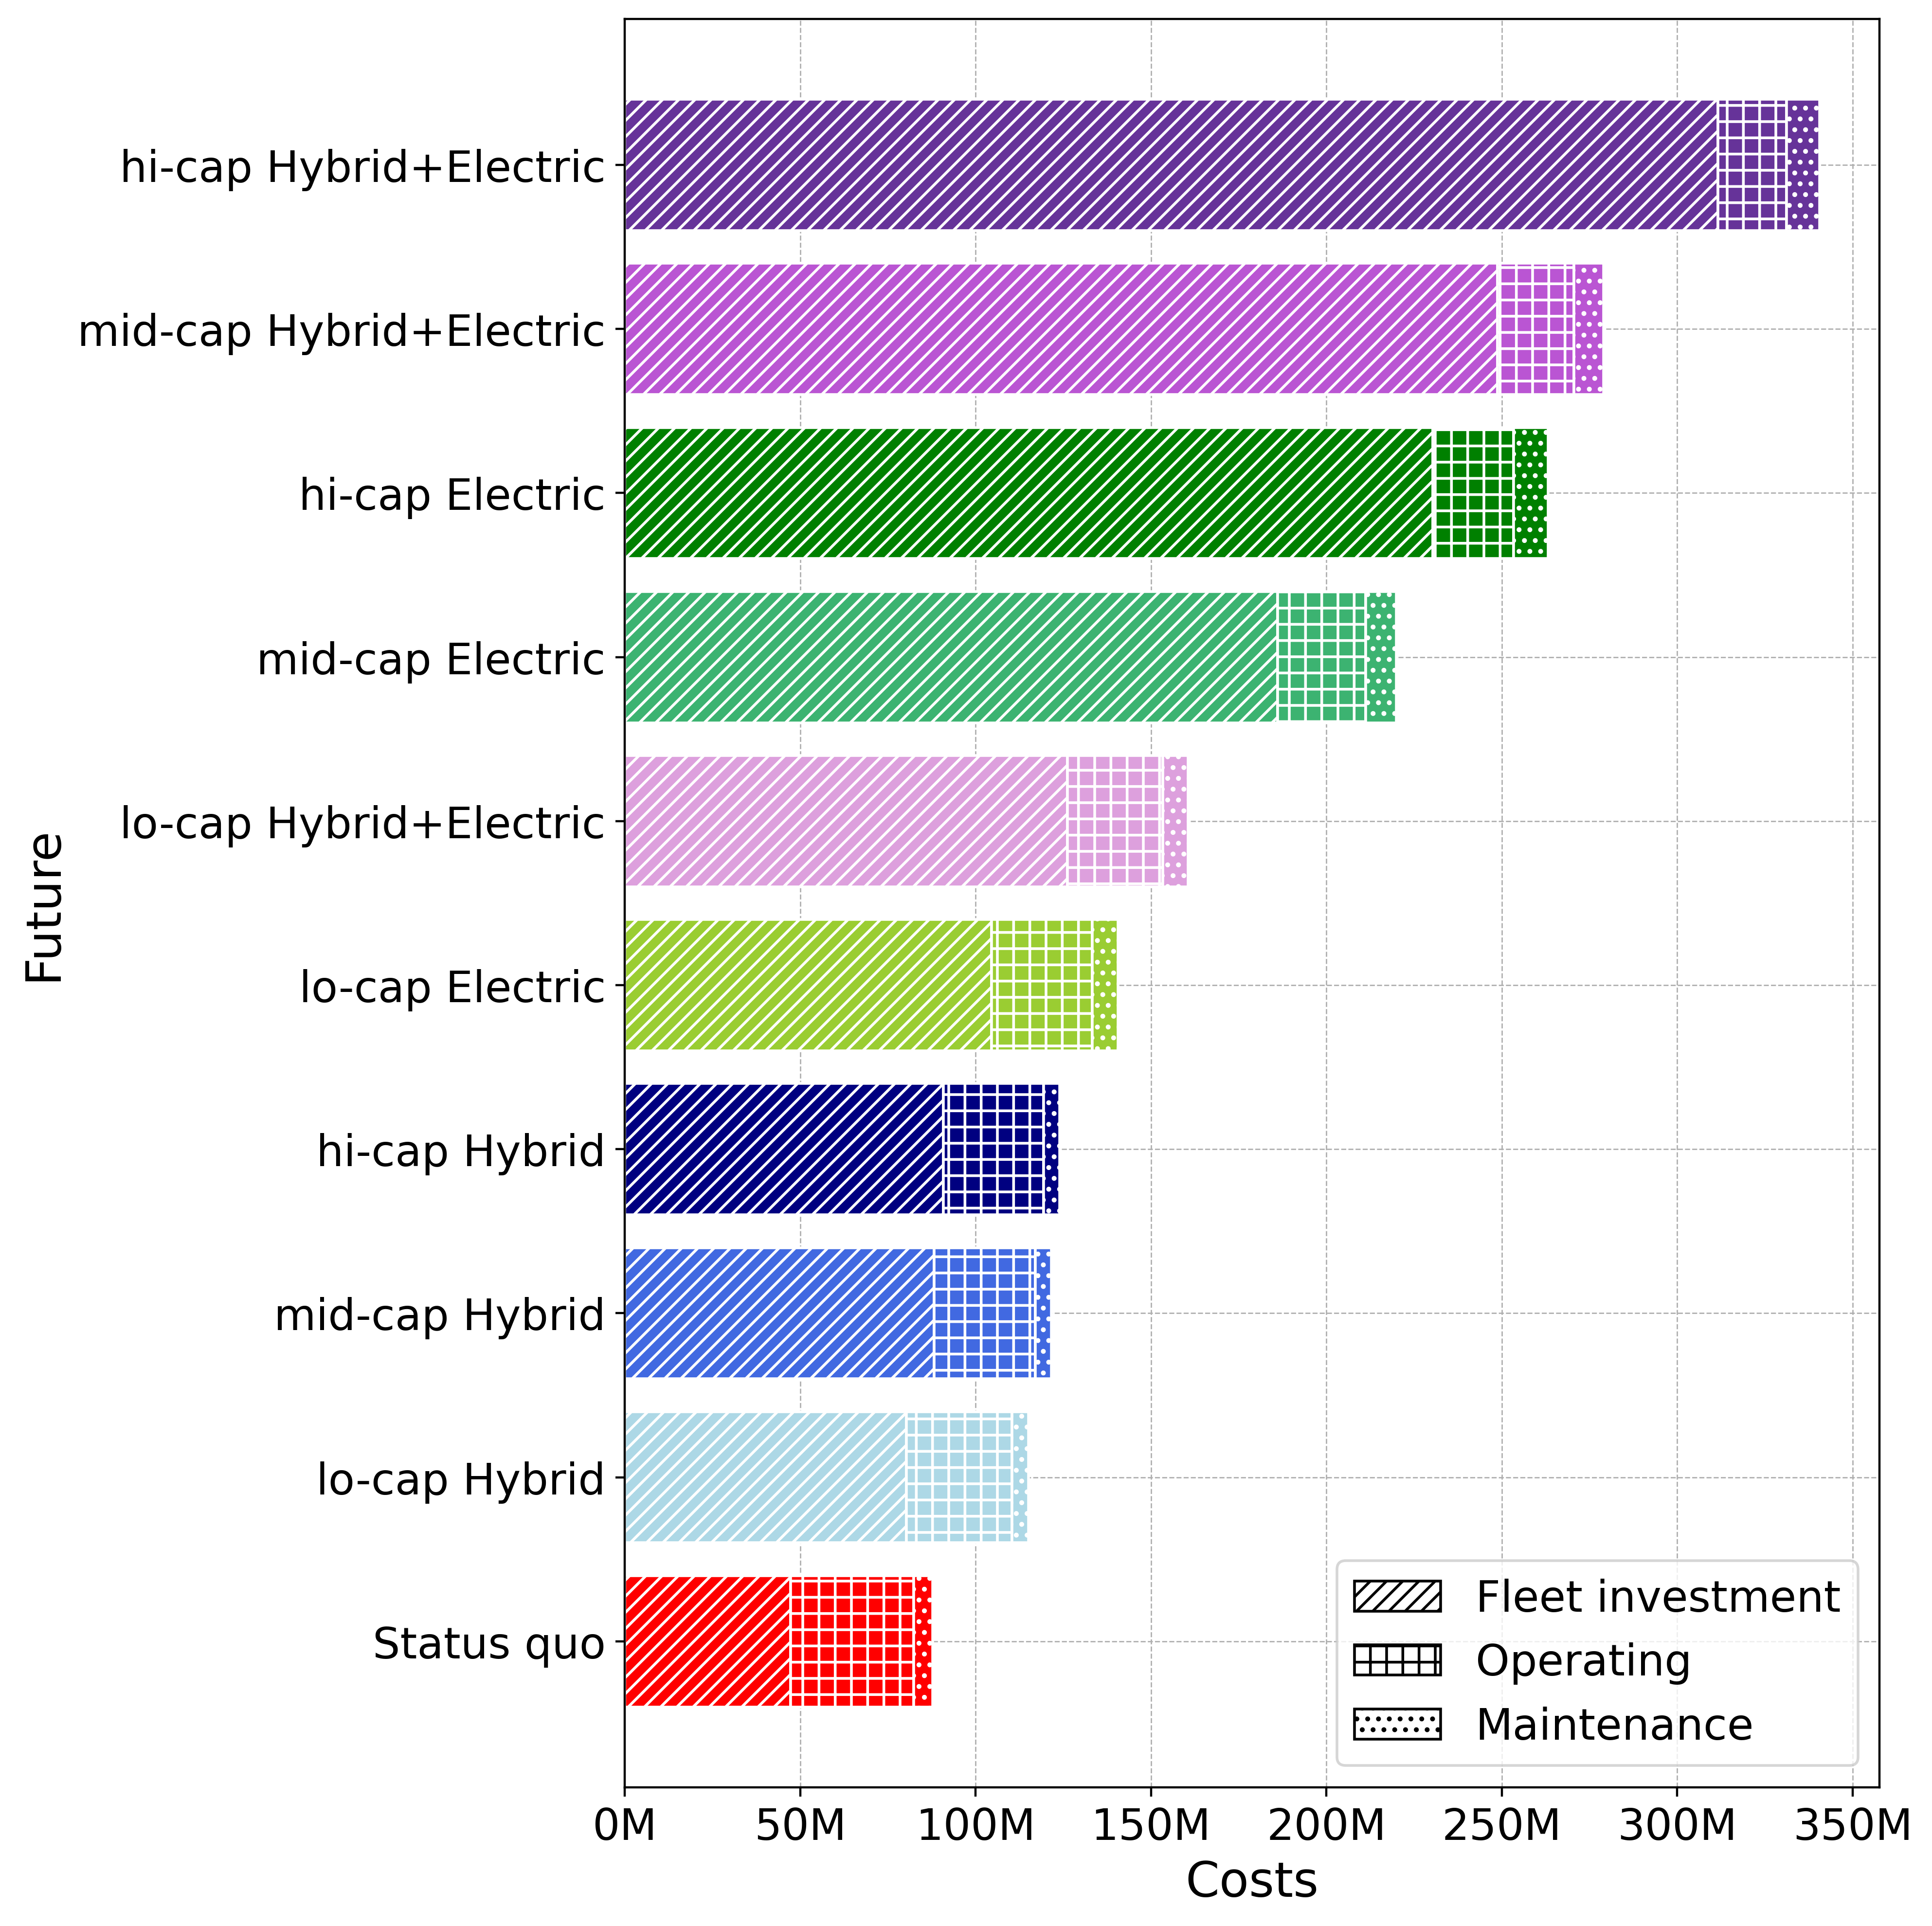

In [316]:
from matplotlib.patches import Patch


grouped_df = df_cost_emission_aggregated.copy()


# Sort the grouped_df by total cost (operating + maintenance + fleet investment) in descending order
#grouped_df['Total_Expenditure'] = grouped_df['operating_cost'] + grouped_df['maintenance_cost'] + grouped_df['total_cost']
grouped_df = grouped_df.sort_values(by='Total_Expenditure', ascending=True).reset_index(drop=True)


custom_palette = {
    "Status quo": "red",
    "lo-cap Hybrid": "lightblue",
    "mid-cap Hybrid": "royalblue",
    "hi-cap Hybrid": "navy",
    #"hi-cap Hybrid": "mediumblue",
    "lo-cap Hybrid+Electric": "plum",
    "mid-cap Hybrid+Electric": "mediumorchid",
    "hi-cap Hybrid+Electric": "rebeccapurple",
    "lo-cap Electric": "yellowgreen",
    "mid-cap Electric": "mediumseagreen",
    "hi-cap Electric": "green"
}


# Set the positions and width for the bars (after sorting)
positions = np.arange(len(grouped_df))
bar_height = 0.8  # Increased the thickness of the bars

# Create the plot
plt.figure(figsize=(10, 10), dpi=400)

# Plot the fleet investment costs with more discernible hatches (horizontal bars)
plt.barh(positions, grouped_df['total_cost'], 
         color=[custom_palette[future] for future in grouped_df['future']], 
         label='Fleet investment Cost', height=bar_height, hatch='////', edgecolor='white')

# Plot the operating costs with more discernible hatches (stacked on top of fleet investment)
plt.barh(positions, grouped_df['operating_cost'], 
         left=grouped_df['total_cost'], 
         color=[custom_palette[future] for future in grouped_df['future']], 
         label='Operating Cost', height=bar_height, hatch='++', edgecolor='white')

# Plot the maintenance costs with more discernible hatches (stacked on top of fleet investment and operating)
plt.barh(positions, grouped_df['maintenance_cost'], 
         left=grouped_df['total_cost'] + grouped_df['operating_cost'], 
         color=[custom_palette[future] for future in grouped_df['future']], 
         label='Maintenance Cost', height=bar_height, hatch='...', edgecolor='white')

# Add titles and labels
plt.ylabel('Future', fontsize=18)  # Increased font size of y-axis labels
plt.xlabel('Costs', fontsize=18)   # Removed "(Million USD)" from the x-axis label

# Update plt.yticks to improve label alignment for the categories
plt.yticks(positions, grouped_df['future'], fontsize=16)  # Increased font size of y-axis labels
plt.xticks(fontsize=16)

# Format x-axis to show values in million USD with the M symbol
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}M'))

# Move grid lines to the background
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().set_axisbelow(True)

# Adjust the legend to show only hatches, not colors in the legend
legend_elements = [Patch(facecolor='white', edgecolor='black', hatch='////', label='Fleet investment'),
                   Patch(facecolor='white', edgecolor='black', hatch='++', label='Operating'),
                   Patch(facecolor='white', edgecolor='black', hatch='...', label='Maintenance')]

plt.legend(handles=legend_elements, title='', fontsize=16, title_fontsize=26, loc='lower right')

# Save and display the plot
plt.tight_layout()
plt.savefig(r'../../figures/allcosts-v02.png', dpi=400)
plt.show()


In [308]:
### Second version of the plot with cost and co-benefit (health) for simulation years to 2040

In [309]:
## Version without disocunt rate

#df_cost_emission_aggregated['avoided_Yearly_dist_CDB'] = df_cost_emission_aggregated['Yearly_dist_CDB'].loc[df_cost_emission_aggregated['future']=='Status quo'].item()
#df_cost_emission_aggregated['avoided_Yearly_dist_HEB'] = df_cost_emission_aggregated['Yearly_dist_HEB'].loc[df_cost_emission_aggregated['future']=='Status quo'].item()

#mpg_CDB = 3.17
#mpg_HEB = 3.85

#df_cost_emission_aggregated['benefit']= (df_cost_emission_aggregated['avoided_Yearly_dist_CDB']+df_cost_emission_aggregated['avoided_Yearly_dist_HEB']*(mpg_HEB / mpg_CDB))*0.202/1000000*410000 + (df_cost_emission_aggregated['avoided_Yearly_dist_CDB']+df_cost_emission_aggregated['avoided_Yearly_dist_HEB']*(mpg_HEB / mpg_CDB))*8.613/1000000*6100

# Convert benefit to Million
#df_cost_emission_aggregated['benefit']=df_cost_emission_aggregated['benefit']/1000000

#df_cost_emission_aggregated['cost-benefit'] = df_cost_emission_aggregated['Total_Expenditure'] - df_cost_emission_aggregated['benefit']

#df_cost_emission_aggregated

In [310]:
df_cost_emission_aggregated

,future,Scenario,Strategy,YearlyResult,CO2e,Yearly_dist_CDB,Yearly_dist_HEB,Yearly_dist_BEB,avoided_CO2e,total_cost,operating_cost,maintenance_cost,Total_Expenditure
0,Status quo,lo-cap,Status quo,1.344175e+07,185737.789365,5.381610e+07,4.417185e+06,3.312887e+06,0.000000,47.335032,35.042436,5.341761,87.719229
1,hi-cap Electric,hi-cap,Electric,6.796995e+06,101374.955740,2.829358e+07,3.719135e+06,2.953760e+07,84362.833625,230.388471,23.012501,9.816584,263.217556
2,hi-cap Hybrid,hi-cap,Hybrid,1.071956e+07,158789.987665,6.215836e+06,5.202169e+07,3.312784e+06,26947.801699,90.882765,28.507664,4.555430,123.945859
3,hi-cap Hybrid+Electric,hi-cap,Hybrid+Electric,5.572264e+06,89315.688673,6.837397e+06,2.521011e+07,2.950280e+07,96422.100692,311.556273,19.523480,9.524002,340.603755
4,lo-cap Electric,lo-cap,Electric,9.954710e+06,146410.322353,4.165014e+07,4.416844e+06,1.548333e+07,39327.467012,104.520978,28.706458,7.365802,140.593239
5,lo-cap Hybrid,lo-cap,Hybrid,1.121670e+07,164070.834343,1.554016e+07,4.269732e+07,3.312830e+06,21666.955022,80.297868,30.041009,4.690670,115.029548
6,lo-cap Hybrid+Electric,lo-cap,Hybrid+Electric,9.290610e+06,141124.044906,3.138623e+07,1.487835e+07,1.528573e+07,44613.744459,126.233815,27.112440,7.203238,160.549493
7,mid-cap Electric,mid-cap,Electric,7.994369e+06,120784.055640,3.372237e+07,4.416952e+06,2.341099e+07,64953.733725,186.029213,25.168109,8.742443,219.939765
8,mid-cap Hybrid,mid-cap,Hybrid,1.084165e+07,160072.311202,8.480245e+06,4.975722e+07,3.312843e+06,25665.478163,88.146082,28.908765,4.591950,121.646797
9,mid-cap Hybrid+Electric,mid-cap,Hybrid+Electric,6.702125e+06,107997.665342,1.087212e+07,2.732541e+07,2.335278e+07,77740.124022,248.788239,21.740169,8.447198,278.975606


In [311]:
# Split Status Quo separately
df_status_quo = df_emission[df_emission['future'] == 'Status quo'][['Year', 'Scenario', 'Strategy', 'Yearly_dist_CDB', 'Yearly_dist_HEB']].copy()

df_status_quo = df_status_quo.rename(columns={
    'Yearly_dist_CDB': 'Yearly_dist_CDB_statusquo',
    'Yearly_dist_HEB': 'Yearly_dist_HEB_statusquo'
})

# Filter out Status quo from main df
df_emission = df_emission[df_emission['future'] != 'Status quo'].copy()

# Merge the correct status quo yearly distances back into df_emission based on year
df_emission = df_emission.merge(df_status_quo, on='Year', how='left')

# Now you can calculate avoided distances correctly year-by-year
df_emission['avoided_Yearly_dist_CDB'] = df_emission['Yearly_dist_CDB_statusquo'] - df_emission['Yearly_dist_CDB']
df_emission['avoided_Yearly_dist_HEB'] = df_emission['Yearly_dist_HEB_statusquo'] - df_emission['Yearly_dist_HEB']

# Ensure no negative avoided distances
df_emission['avoided_Yearly_dist_CDB'] = df_emission['avoided_Yearly_dist_CDB'].clip(lower=0)
df_emission['avoided_Yearly_dist_HEB'] = df_emission['avoided_Yearly_dist_HEB'].clip(lower=0)


# Continue with your previous benefit calculation:
mpg_CDB = 3.17
mpg_HEB = 3.85

df_emission['yearly_benefit'] = (
    (df_emission['avoided_Yearly_dist_CDB'] + df_emission['avoided_Yearly_dist_HEB'] * (mpg_HEB / mpg_CDB))
    * 0.202 / 1_000_000 * 410_000
    +
    (df_emission['avoided_Yearly_dist_CDB'] + df_emission['avoided_Yearly_dist_HEB'] * (mpg_HEB / mpg_CDB))
    * 8.613 / 1_000_000 * 6100
) / 1_000_000  # dollars to million dollars

# Discount factor per year
discount_rate = 0.04
df_emission['discount_factor'] = 1 / ((1 + discount_rate) ** (df_emission['Year'] - 2022))

# Discounted benefit
df_emission['discounted_benefit'] = df_emission['yearly_benefit'] * df_emission['discount_factor']

# Group by future
df_benefit_discounted = df_emission.groupby('future', as_index=False)['discounted_benefit'].sum()

# Rename for merging
df_benefit_discounted = df_benefit_discounted.rename(columns={'discounted_benefit': 'benefit'})


# Group the discounted benefits by 'future' and sum across all years
df_benefit_total = df_emission.groupby('future', as_index=False)['discounted_benefit'].sum()
df_benefit_total = df_benefit_total.rename(columns={'discounted_benefit': 'benefit'})


# Merge the total discounted benefit into your df_cost_emission_aggregated
df_cost_emission_aggregated = df_cost_emission_aggregated.merge(df_benefit_total, on='future', how='left')

# New column: Total expenditure minus benefit
df_cost_emission_aggregated['cost-benefit'] = df_cost_emission_aggregated['Total_Expenditure'] - df_cost_emission_aggregated['benefit']

df_cost_emission_aggregated

,future,Scenario,Strategy,YearlyResult,CO2e,Yearly_dist_CDB,Yearly_dist_HEB,Yearly_dist_BEB,avoided_CO2e,total_cost,operating_cost,maintenance_cost,Total_Expenditure,benefit,cost-benefit
0,Status quo,lo-cap,Status quo,1.344175e+07,185737.789365,5.381610e+07,4.417185e+06,3.312887e+06,0.000000,47.335032,35.042436,5.341761,87.719229,NaN,NaN
1,hi-cap Electric,hi-cap,Electric,6.796995e+06,101374.955740,2.829358e+07,3.719135e+06,2.953760e+07,84362.833625,230.388471,23.012501,9.816584,263.217556,1.483445,261.734111
2,hi-cap Hybrid,hi-cap,Hybrid,1.071956e+07,158789.987665,6.215836e+06,5.202169e+07,3.312784e+06,26947.801699,90.882765,28.507664,4.555430,123.945859,4.421502,119.524357
3,hi-cap Hybrid+Electric,hi-cap,Hybrid+Electric,5.572264e+06,89315.688673,6.837397e+06,2.521011e+07,2.950280e+07,96422.100692,311.556273,19.523480,9.524002,340.603755,3.753842,336.849913
4,lo-cap Electric,lo-cap,Electric,9.954710e+06,146410.322353,4.165014e+07,4.416844e+06,1.548333e+07,39327.467012,104.520978,28.706458,7.365802,140.593239,1.016925,139.576314
5,lo-cap Hybrid,lo-cap,Hybrid,1.121670e+07,164070.834343,1.554016e+07,4.269732e+07,3.312830e+06,21666.955022,80.297868,30.041009,4.690670,115.029548,3.357834,111.671714
6,lo-cap Hybrid+Electric,lo-cap,Hybrid+Electric,9.290610e+06,141124.044906,3.138623e+07,1.487835e+07,1.528573e+07,44613.744459,126.233815,27.112440,7.203238,160.549493,1.932317,158.617176
7,mid-cap Electric,mid-cap,Electric,7.994369e+06,120784.055640,3.372237e+07,4.416952e+06,2.341099e+07,64953.733725,186.029213,25.168109,8.742443,219.939765,1.640151,218.299614
8,mid-cap Hybrid,mid-cap,Hybrid,1.084165e+07,160072.311202,8.480245e+06,4.975722e+07,3.312843e+06,25665.478163,88.146082,28.908765,4.591950,121.646797,4.146081,117.500716
9,mid-cap Hybrid+Electric,mid-cap,Hybrid+Electric,6.702125e+06,107997.665342,1.087212e+07,2.732541e+07,2.335278e+07,77740.124022,248.788239,21.740169,8.447198,278.975606,3.872374,275.103232


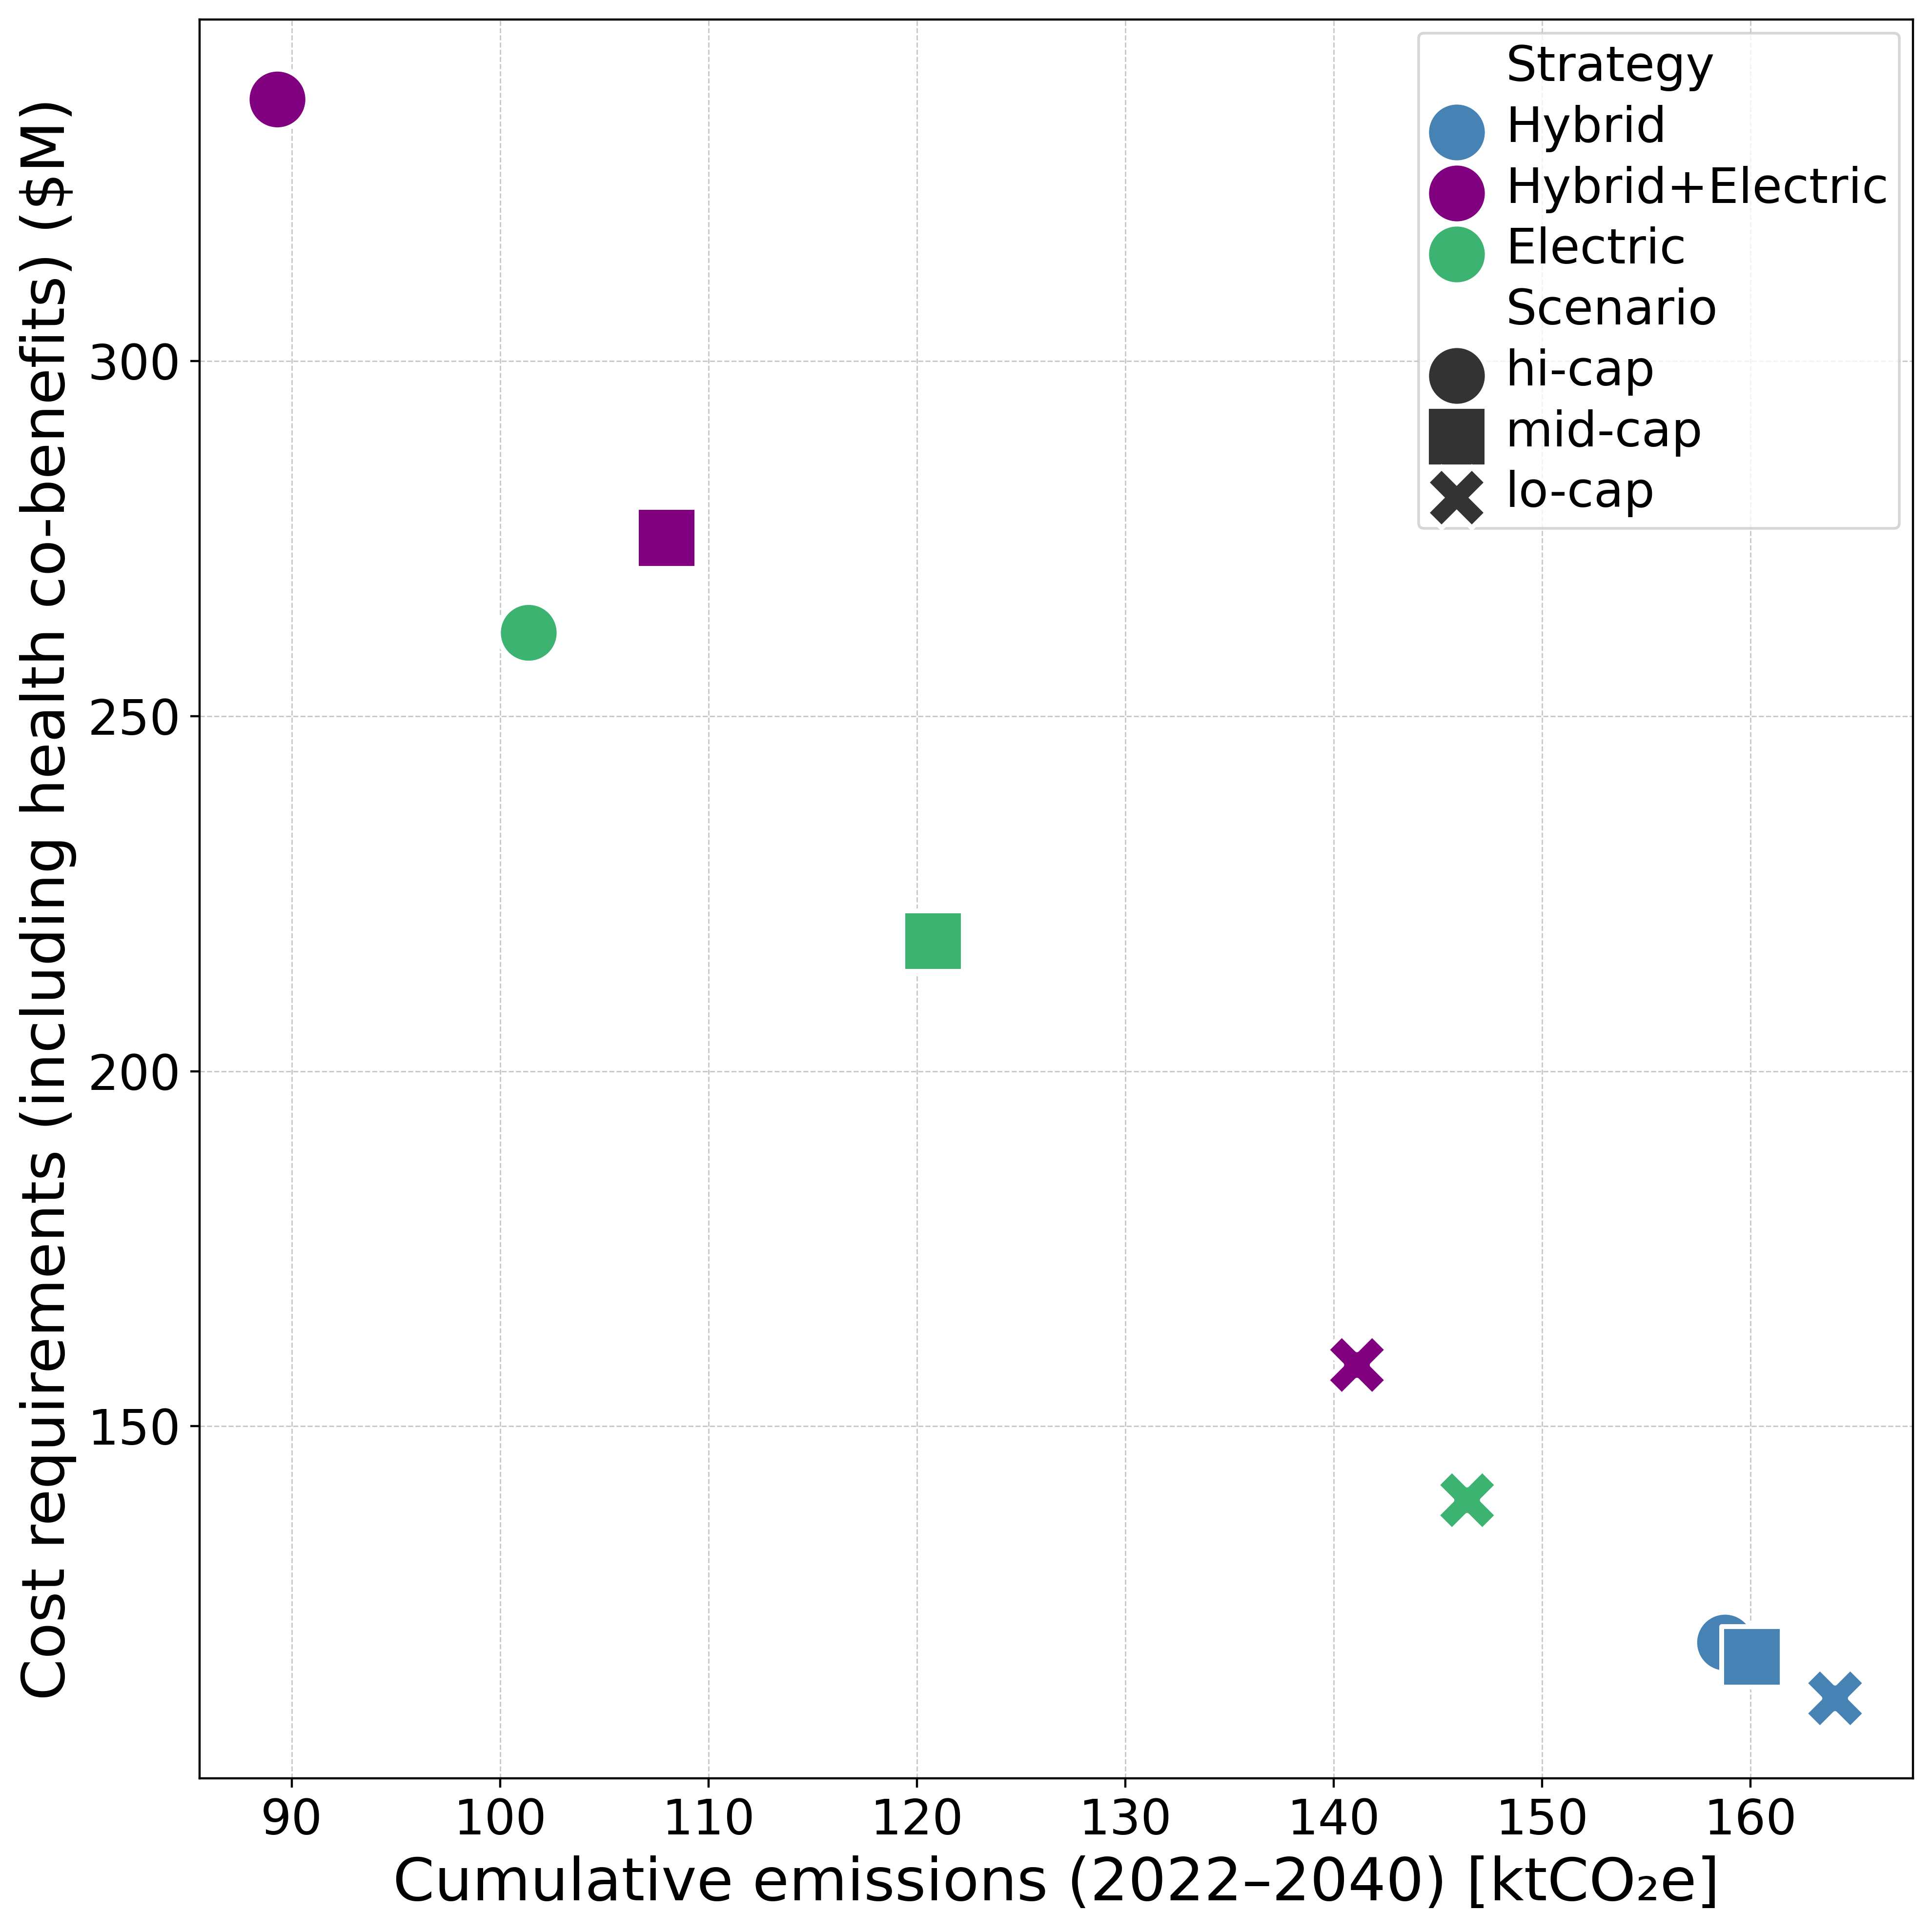

In [312]:
df = df_cost_emission_aggregated.copy()

# Unit conversion
df['CO2e_kt'] = df['CO2e'] / 1000
df['Total_Expenditure_M'] = df['Total_Expenditure']

# Filter out 'Status quo'
df_plot = df[df['future'] != 'Status quo'].copy()

# Color and marker definitions
colors = {
    'Hybrid': 'steelblue',
    'Hybrid+Electric': 'purple',
    'Electric': 'mediumseagreen'
}
markers = {
    'hi-cap': 'o',
    'lo-cap': 'X',
    'mid-cap': 's'
}

# Start plot
plt.figure(figsize=(10, 10), dpi=400)
plot = sns.scatterplot(
    data=df_plot,
    x='CO2e_kt',
    y='cost-benefit',
    hue='Strategy',
    hue_order=list(colors.keys()),
    palette=colors,
    style='Scenario',
    style_order=['hi-cap','mid-cap','lo-cap'],  # Scenario legend order
    markers=markers,
    zorder= 3,
    s=500
)

# Axis labels
plt.xlabel('Cumulative emissions (2022–2040) [ktCO₂e]', fontsize=22)
plt.ylabel('Cost requirements (including health co-benefits) ($M)', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Customize legend
legend = plot.legend_
legend.get_title().set_fontsize('20')
for text in legend.get_texts():
    text.set_fontsize(18)

    
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)


#plt.xlim(0, 100)
#plt.ylim(0, 550)


plt.tight_layout()
plt.savefig(r'../../figures/scatterplot_emissions_vs_investment_with_co_benefits.png', bbox_inches='tight', dpi=400)
plt.show()
